## Observations

1. CBS and BBC had the highest sentiment polarities out of all of the Media Sources with CBS in the lead 
2. FoxNews has the most negative polarities.
3. Aside from CBS and BBC (which were overwhelmningly positive), the other media sources were so close to 0 for the tweets analyzed that no strong conclusion can be drawn. 

In [40]:
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import scipy, pylab

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [127]:
media_sources = ['@BBC', '@CBS', '@FoxNews','@CNN','@nytimes']
merged_list = []
sentiments = []

def media_sources_analysis(media_sources):
    
    for media in media_sources:
        
        for idx, tweet in enumerate(tweepy.Cursor(api.user_timeline, id=media ).items(100)):
        
            tweet = tweet._json
            tweet['Tweets_ago'] = idx

            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            

            sentiments.append({"Date": tweet["created_at"],
                               "Text": tweet["text"],
                               "Media": media, 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neg,
                               "Neutral": neu,
                               "Tweets Ago": idx})

        merged_list.append(sentiments)
        
media_sources_analysis(media_sources)

In [128]:
df = pd.DataFrame.from_dict(sentiments)
new_df = df.sort_values(by='Date').reset_index()
new_df

,index,Compound,Date,Media,Negative,Neutral,Positive,Text,Tweets Ago
0,189,0.8442,Fri Jun 01 17:00:03 +0000 2018,@CBS,0.000,0.664,0.336,Remember @Lin_Manuel’s beautiful sonnet from t...,89
1,188,-0.3903,Fri Jun 01 17:39:17 +0000 2018,@CBS,0.131,0.807,0.062,"Call us old-fashioned, but we donut want you m...",88
2,179,0.9078,Fri Jun 08 13:58:15 +0000 2018,@CBS,0.000,0.564,0.436,We all get by with a little help from our frie...,79
3,178,0.0000,Fri Jun 08 15:00:03 +0000 2018,@CBS,0.000,1.000,0.000,Here's @laChanze with a reminder that you can ...,78
4,177,0.2960,Fri Jun 08 19:46:17 +0000 2018,@CBS,0.000,0.820,0.180,Join @etnow's @DDirecto this Sunday on the #To...,77
5,110,0.3595,Fri Jun 15 18:48:29 +0000 2018,@CBS,0.000,0.872,0.128,"Casting Alert! @paulwesley, @DaniaJRamirez &am...",10
6,99,0.0000,Fri Jun 22 13:02:03 +0000 2018,@BBC,0.000,1.000,0.000,"😂🎤 Hello, it's literally me... \n#HearHer http...",99
7,98,0.0000,Fri Jun 22 16:01:00 +0000 2018,@BBC,0.000,1.000,0.000,When the weekend's so close you can almost tou...,98
8,97,0.0000,Fri Jun 22 17:00:21 +0000 2018,@BBC,0.000,1.000,0.000,🐾🐶💕 Would you give a deaf dog a home? https://...,97
9,96,-0.3182,Fri Jun 22 18:01:05 +0000 2018,@BBC,0.150,0.850,0.000,😂👛 Everyone has that one mate who always loses...,96


In [126]:
new_df.to_csv

<bound method DataFrame.to_csv of      index  Compound                            Date     Media  Negative  \
0      189    0.8442  Fri Jun 01 17:00:03 +0000 2018      @CBS     0.000   
1      188   -0.3903  Fri Jun 01 17:39:17 +0000 2018      @CBS     0.131   
2      179    0.9078  Fri Jun 08 13:58:15 +0000 2018      @CBS     0.000   
3      178    0.0000  Fri Jun 08 15:00:03 +0000 2018      @CBS     0.000   
4      177    0.2960  Fri Jun 08 19:46:17 +0000 2018      @CBS     0.000   
5      110    0.3595  Fri Jun 15 18:48:29 +0000 2018      @CBS     0.000   
6       99    0.0000  Fri Jun 22 13:02:03 +0000 2018      @BBC     0.000   
7       98    0.0000  Fri Jun 22 16:01:00 +0000 2018      @BBC     0.000   
8       97    0.0000  Fri Jun 22 17:00:21 +0000 2018      @BBC     0.000   
9       96   -0.3182  Fri Jun 22 18:01:05 +0000 2018      @BBC     0.150   
10     104    0.4199  Fri Jun 22 18:33:53 +0000 2018      @CBS     0.000   
11      95    0.4215  Fri Jun 22 19:04:06 +0000 2018  

In [53]:
media_type = new_df.groupby('Media')
BBC = media_type.get_group('@BBC')
CBS = media_type.get_group('@CBS')
FoxNews = media_type.get_group('@FoxNews')
CNN = media_type.get_group('@CNN')
nytimes = media_type.get_group('@nytimes')

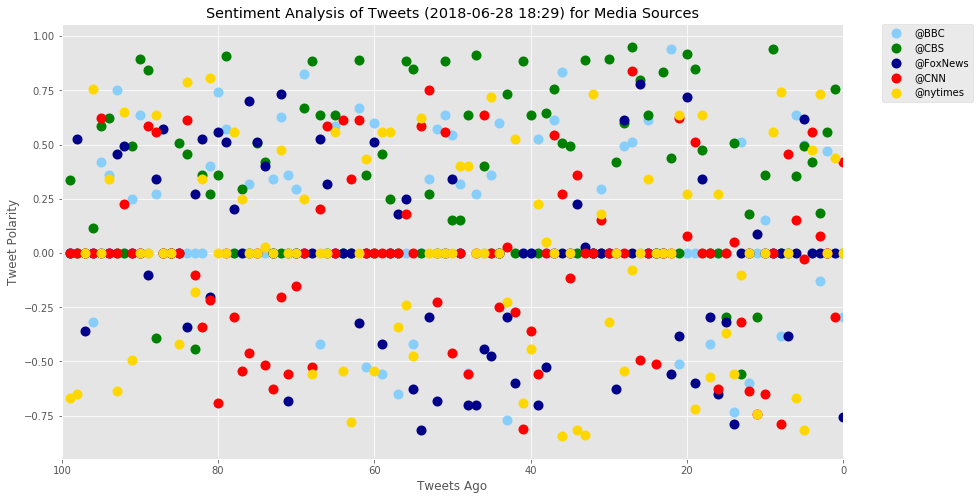

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(BBC['Tweets Ago'], BBC['Compound'], c = 'lightskyblue', alpha = 1, linewidth =4 )
ax.scatter(CBS['Tweets Ago'], CBS['Compound'], c = 'green', alpha = 1, linewidth =4 )
ax.scatter(FoxNews['Tweets Ago'], FoxNews['Compound'], c = 'darkblue', alpha = 1, linewidth =4 )
ax.scatter(CNN['Tweets Ago'], CNN['Compound'], c = 'red', alpha = 1, linewidth =4 )
ax.scatter(nytimes['Tweets Ago'], nytimes['Compound'], c = 'gold', alpha = 1, linewidth =4 )

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for Media Sources")
plt.xlim(100,0)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

plt.legend((list(media_sources)), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)

plt.figure(figsize=(20, 8))

plt.show()
plt.savefig('sentiment_analysis.png')

In [96]:
overall_sentiment = new_df.groupby('Media')['Compound'].mean().reset_index()
overall_sentiment

,Media,Compound
0,@BBC,0.122041
1,@CBS,0.340684
2,@CNN,-0.011283
3,@FoxNews,-0.023109
4,@nytimes,0.010883


In [124]:
overall_sentiment.to_csv

<bound method DataFrame.to_csv of       Media  Compound
0      @BBC  0.122041
1      @CBS  0.340684
2      @CNN -0.011283
3  @FoxNews -0.023109
4  @nytimes  0.010883>

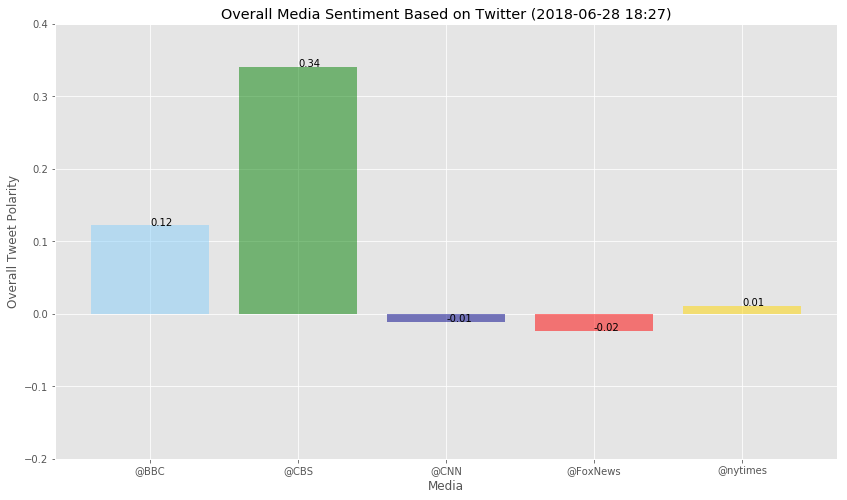

In [122]:
fig = plt.figure()

count = 0

for sentiment in overall_sentiment['Compound']:
    plt.text(count, sentiment, str(round(sentiment,2)))
    count = count + 1
    space = 7


plt.bar(overall_sentiment['Media'], overall_sentiment['Compound'], 
        color=['lightskyblue', 'green', 'darkblue', 'red', 'gold'], 
        alpha=0.5, 
        align="center")

plt.ylim(-.2, 0.4)

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Overall Media Sentiment Based on Twitter ({now})")

plt.xlabel("Media")
plt.ylabel("Overall Tweet Polarity")

plt.show()
plt.savefig('overall_media_sentiment.png')